# Les Énigmes Quantiques 002 - Les Quatre Chevelures
 Lors d’un carnaval, Alice, Bob, Charlie et Dalia décident de participer à un concours pour gagner un voyage inter-spatial dans l'espace. Le défi? Chaque personne doit deviner sa propre couleur de chevelure. L'équipe devra travailler ensemble pour trouver la bonne stratégie afin de déterminer la couleur orange ou indigo de toutes les chevelures.


# Imports

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import *

## Création du circuit de l'énigme

On crée un circuit de 8 qbits pour représenter les 4 couleurs de chevelures et les 4 personnes.

In [2]:
circ = QuantumCircuit(8)

On place une porte Hadamard sur les 4 premiers qbit pour les combinaisons de couleurs

In [3]:
circ.h(0)
circ.h(1)
circ.h(2)
circ.h(3)
circ.barrier()

Alice calcule le nombre de couleurs orange et indigo dans le groupe.

In [4]:
circ.cx(4, 1)
circ.cx(4, 2)
circ.cx(4, 3)
circ.barrier()

Tout le monde entend le resultat d'Alice et enregistre le resultat dans leur reflexion.

In [5]:
circ.cx(4, 5)
circ.cx(4, 6)
circ.cx(4, 7)
circ.barrier()

Bob regarde la chevelure devant lui et en déduit la sienne.

In [6]:
circ.cx(2, 5)
circ.cx(3, 5)
circ.barrier()

Charlie et Dalia enregistrent le resultat de Bob dans leur reflexion.

In [7]:
circ.cx(5, 6)
circ.cx(5, 7)
circ.barrier()

Charlie enregistre la chevelure devant lui et l'affiche.

In [8]:
circ.cx(3, 6)
circ.barrier()

Dalia enregistre la chevelure devant elle et l'affiche.

In [9]:
circ.cx(6, 7)

# Affichage du circuit

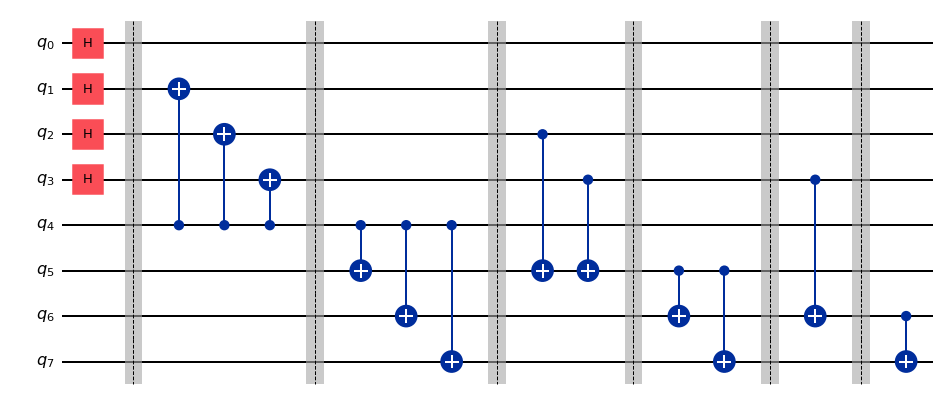

In [11]:
circ.draw("mpl", style="iqx")

# Simulation du circuit

In [12]:
circ.measure_all()
simulator: AerSimulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
result = simulator.run(circ, shots=100_000).result()
counts = result.get_counts(circ)

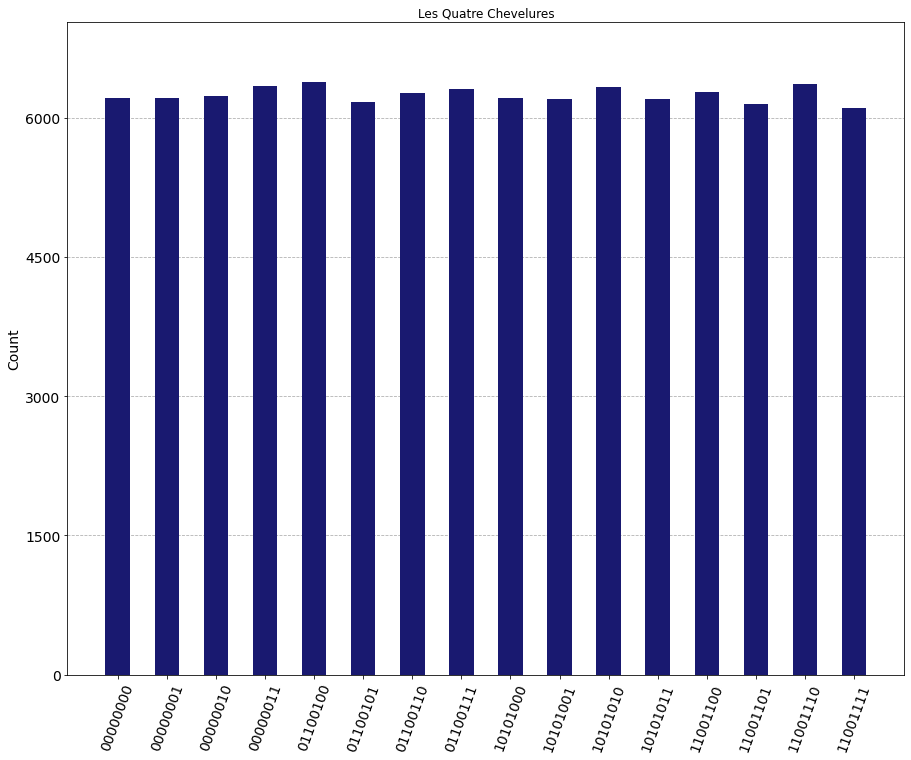

In [14]:
plot_histogram(counts, title="Les Quatre Chevelures", color="midnightblue", figsize=(15, 12), bar_labels=False)